# Introduction:

This is a project completed as part of the Master's in Data Science and AI for the module of ML.

# 1. Author

**Student Name**: Valentina Sánchez Melchor
**Student ID**:  220854162

# 2. Problem formulation

The aim of this project is to build a machine learning pipeline that uses audio segments as an input and is capable of predicting whether an audio segment belongs to a specific participant or not. Hence, this project will test if a machine learning model is capable of identifying a specific human voice. The MLEnds London Sounds dataset will be used to train and test a model. In this case, I chose the recordings that contain my voice (17 in total) and trained the model to predict if a recording was taken by the candidate S19 or not. It will be interesting to tests if a model can succeed at identifying different voices, since that feature could be useful in industry. For example, voice recognition could be used to improve security and privacy features in mobile phone devices.

The MLEnds London Sounds dataset is now available on Kaggle: https://www.kaggle.com/datasets/jesusrequena/mlend-london-sounds

# 3. Machine Learning pipeline

The general structure of the ML pipeline will go as follows:

**inputs --> transformations --> model --> outputs**

In this case, the specific stages will be:

**audio segments --> feature extraction --> decision tree classifier + other models to compare results --> S19/not S19 classification (model with best results)**

The validation of the model will give an idea of how well the model can perform. Moreover, three different models will be trained and the results will be compared.

# 4. Transformation stage

Since raw audio files are complex high dimensional data, a useful way to analyse them can be to extract their features. The features will act as the predictors, reducing dimensionality. These features are able to identify frequency, amplitude and speed of sound in the audio files, which can be useful to understand if the recordings belong to participant S19 or not. Moreover, Mel-Frequency Cepstral Coefficients (MFCCs) is a feature commonly used in speech recognition that could help correctly identify and classify different voices.

In this case, the audio features extracted will be:

1.   Power.
2.   Pitch - mean.
3.   Pitch - standard deviation.
4.   Fraction of voiced region.
5.   Root mean square
6.   Spectral centroid
7.   Mel-Frequency Cepstral Coefficients

# 5. Modelling

The ML model chosen to classify the audio files as participant S19 or not participant S19 is the decision tree classifier. Classification trees are a type of supervised machine learning models that classify data into two (or more) discrete categories by transforming data into a decision tree representation. Each internal node of the tree representation denotes an attribute and each leaf node denotes a class label. In this case, the data will be classified as either S19 or not S19. Decision trees can map non-linear relationships and either classify or predict outcomes by using the cause-effect relationship between the predictors and the predicted value. Thus, they can be a powerful classification tools. This model proved to perform better than other models in the *MiniProject_basic* that used the same dataset, and for that reason it will be used again to try and obtain good results.

In this case, a classification tree can be used to classify audio files as S19/not S19 using the given predictors. Compared to other classification algorithms, an advantage of this machine learning algorithm is that the data does not need to be normalised or scaled. And a disadvantage is that it normally takes longer to train the model.

# 6. Methodology

In order to train the classification tree model, the data will be split into train (70%) and validation (30%) data. The training data is used to produce a model that has been trained to classify the audio files as indoors/outdoors by using part of the dataset provided. Once the model is trained, the validation data can be used to test the accuracy of the model. Moreover, a confusion matrix will be used to see how many samples have been correctly and incorrectly classified. This will give us an idea of how well the model is performing. The same method will be used to train a SVM and a logistic regression model, and the results obtained from the three models will be compared so the model with the best overall performance can be chosen.

Sklearn  will be used to train, fit and validate the models.

# 7. Dataset

The *MileEnd_data* dataset contains 2500 audio files that include voice recording, noise and background recording and music recording in some cases. These have been recorded by different people in the same locations around London. The csv file *MLEndLS* links every audio file (file_id) to an area, a spot, outdoors/indoors differentiation and a participant.

I could find the recordings that contained my voice by creating a subset of the *MileEnd_data* dataset that contained the 25 recordings in the spot *dinosaur*, listening to them and identifying my voice in the recording 2483.wav. I could then link that recording to the participant S19 and identify all my recordings (17 in total).

Moreover, some audio features are extracted and used as predictors. These features are capable of finding differences in the sounds of each audio file than can then be used to identify different voices in the audio files. To extract the predictors, we use a function that connects the audio files to the CSV file to create a Numpy array that contains the 7 audio features used as predictors (X) and the binary label (y) to determine whether an audiofile was recorded by participant S19 (y=0) or not recorded by participant S19 (y=1).

The dataset and csv files will be uploaded and preprocessed as follows:

In [37]:
# Upload libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile
from glob import glob

import IPython.display as ipd
from tqdm import tqdm
!pip install librosa
import librosa # librosa will be used to extract audio features

In [38]:
# Upload dataset

files = glob("./MileEnd_data/*.wav") # excluding 2 damaged files
len(files)

2498

In [39]:
# Subset of the dataset (for faster results)

files500 = glob("./subset(500)/*.wav")  # excluding 1 damaged file
len(files500)

499

In [40]:
MLENDLS_df = pd.read_csv('MLEndLS.csv').set_index('file_id')
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


### Finding the recordings that contain my voice

In [41]:
MLENDLS_df['area'].value_counts()

campus        823
westend       666
british       404
Euston        234
southbank     229
kensington    144
Name: area, dtype: int64

In [42]:
Kensington = MLENDLS_df.loc[MLENDLS_df['area'] == "kensington"]
Kensington

,area,spot,in_out,Participant
file_id,,,,
0002.wav,kensington,dinosaur,indoor,S127
0004.wav,kensington,hintze,indoor,S179
0019.wav,kensington,dinosaur,indoor,S82
0031.wav,kensington,dinosaur,indoor,S72
0033.wav,kensington,pond,outdoor,S102
...,...,...,...,...
2448.wav,kensington,pond,outdoor,S19
2482.wav,kensington,marine,indoor,S83
2483.wav,kensington,dinosaur,indoor,S19


In [43]:
Dinosaur = Kensington.loc[Kensington['spot'] == "dinosaur"]
Dinosaur

,area,spot,in_out,Participant
file_id,,,,
0002.wav,kensington,dinosaur,indoor,S127
0019.wav,kensington,dinosaur,indoor,S82
0031.wav,kensington,dinosaur,indoor,S72
0093.wav,kensington,dinosaur,indoor,S167
0171.wav,kensington,dinosaur,indoor,S83
0366.wav,kensington,dinosaur,indoor,S179
0576.wav,kensington,dinosaur,indoor,S99
0851.wav,kensington,dinosaur,indoor,S143
0888.wav,kensington,dinosaur,indoor,S32


After listening to the 25 files, I found that my voice is recorded in the audio file 2483.wav. Thus, I am the participants number S19.

In [44]:
MLENDLS_df['Participant'].value_counts()

S28     18
S179    18
S12     18
S177    18
S143    18
        ..
S32      6
S138     6
S7       3
S116     2
S128     1
Name: Participant, Length: 176, dtype: int64

In [45]:
Me = MLENDLS_df.loc[MLENDLS_df['Participant'] == "S19"]
Me

,area,spot,in_out,Participant
file_id,,,,
0265.wav,campus,ground,indoor,S19
0560.wav,campus,square,outdoor,S19
1103.wav,kensington,marine,indoor,S19
1274.wav,westend,national,indoor,S19
1401.wav,campus,reception,indoor,S19
1445.wav,kensington,hintze,indoor,S19
1447.wav,westend,market,indoor,S19
1456.wav,kensington,cromwell,outdoor,S19
1574.wav,campus,curve,indoor,S19



### Comparing S19 and non-S19 recordings

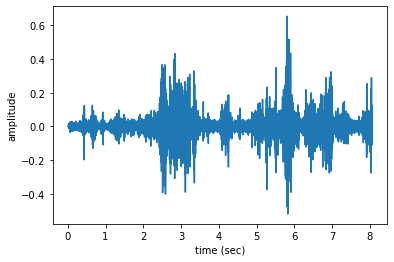

In [46]:
# Comparing 2483.wav (S19) to 300 (not S19)
# 2483
n=2484 # need to add 1
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

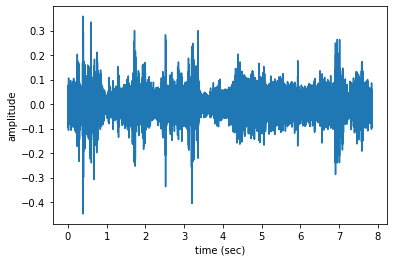

In [47]:
# Comparing 2483.wav (S19) to 0300 (not S19)
# 300
n=301 # need to add 1
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

Both audio files are recorded outdoors, and the voice difference is both visible and audible. The extracted features will help differentiate and correctly classify audio files as S19/not S19.

### Transformations: Feature extraction

In [48]:
# Feature extraction
# Function to extract features
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [49]:
def spectral_centroid(x, samplerate=44100):
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/samplerate)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean

In [50]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['Participant']=='S19'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    rms = np.sqrt(np.mean(x**2))
    spectral_c = spectral_centroid(x)
    mfccs = np.mean(librosa.feature.mfcc(x,fs)) # Useful for voice recognition

    xi = [power,pitch_mean,pitch_std,voiced_fr,rms,mfccs]
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

In [ ]:
# Obtain predictor array (X) and a binary label (y)
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

# 8. Results

This section will be used to carry out the experiments, and the results will be outlined at the end.

In [52]:
# Split data into test and train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1748, 6), (750, 6), (1748,), (750,))

### Model 1: logistic regression

In [53]:
# all parameters not specified are set to their defaults
model = LogisticRegression()
model.fit(X_train, y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.9948512585812357
Validation  Accuracy 0.9893333333333333


In [54]:
# Confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

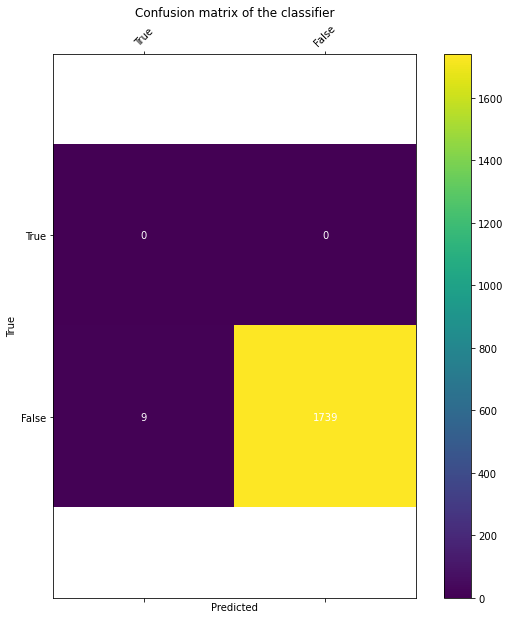

In [55]:
y_test = yt_p
preds = y_train
labels = [True, False]
confusion_matrix_heatmap(y_test, preds, labels)

### Model 2: decision tree

In [56]:
# Train decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.9853333333333333


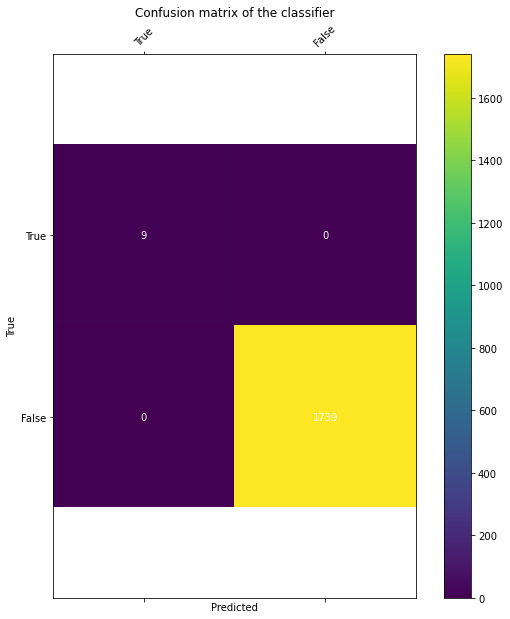

In [57]:
# Confusion matrix
y_test = yt_p
preds = y_train
labels = [True, False]
confusion_matrix_heatmap(y_test, preds, labels)

### Model 3: support vector machine

In [58]:
# Support vector machine
from sklearn import svm
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9948512585812357
Validation  Accuracy 0.9893333333333333
The support vectors are (79, 6)


In [59]:
# Confusion matrix
y_test = yt_p
preds = y_train
labels = [True, False]

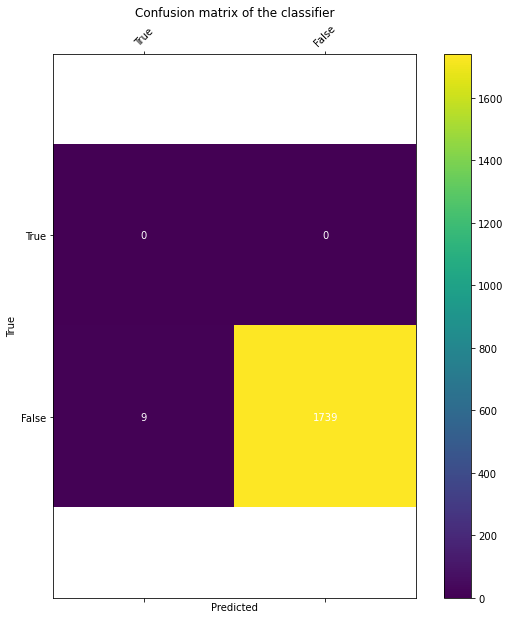

In [60]:
confusion_matrix_heatmap(y_test, preds, labels)

After training and testing 3 different models (decision tree, support vector machine, logistic regression), the results obtained from each of them can be compared.

**Model 1: logistic regression**
Training Accuracy 0.9
Validation  Accuracy 0.9
Confusion matrix: TP--> 0, TN --> 0, FP --> 16, FN -->1732

The results obtained for the decision tree show 0.9 accuracy on the training and validation datasets. However, the confusion matrix shows that the model was not able to correctly classify any of the TP, and classified the 16 recordings made by S19 as FP. Thus, the performance of the model is not good since it can only correctly classify the non-S19 data (which is most of the dataset and that is why the model gets very good accuracy results) but none of the yes S19 data. Thus, **Model 1** does not perform well.

**Model 2: decision tree**
Training Accuracy 1.0
Validation  Accuracy 0.9
Confusion matrix: TP--> 16, TN --> 0, FP --> 0, FN --> 1732

The decision tree model has a training accuracy of 0.1 and a validation accuracy of 0.9, which implies that the model performs very well. Moreover, the confusion matrix shows that the model correctly classifies 16 S19 (TP) recordings  and 1732 non-S19 recordings (FN). **Model 2** has a very good performance.

**Model 3: SVM**
Training Accuracy 0.9
Validation  Accuracy 0.9
The support vectors are (119, 6)
Confusion matrix: TP--> 0, TN --> 0, FP --> 16, FN -->1732

The results obtained for the SVM model show 0.9 accuracy on the training and validation datasets. However, as **Model 1**, the confusion matrix shows that the model was not able to correctly classify any of the TP, and classified the 16 recordings made by S19 as FP. Hence, the high accuracy of the models is only obtained due to the imbalance of the dataset but the model does not perform well.

Model 1 and 3 do seem to differentiate the 16 recordings that belong to the participant S19, but the incorrectly classify them as FP. Model 2 is the only one that correctly classifies the 16 recordings as TP and thus the model with the best overall performance.

# 9. Conclusions

The main limitation of this analysis is the imbalance of the dataset (17 recordings that belong to S19 and 2481 recordings that do not belong to S19). This imbalance comes with the risk of that either the training or the validation data could have no recordings belonging to S19 once they are split. However, the given test/train split seems to have worked to produce good results in one of the models this time. The decision tree model has been able to correctly classify 16 recordings belonging to participant S19 and 1732 not belonging to participant S19. This model could be improved by generating less imbalanced data and training and testing the model again. Although the model seems to be able to perform quite well with the given data, given that the 17 recordings belonging to S19 are more or less evenly distributed within the entire dataset.

Note that the final results will change every time the whole code is run due to that the way the data is split will change.